## a.	Loading and preprocessing the image data


In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [3]:
# Load the training and testing data from CSV files
train = pd.read_csv(r"mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values
x_train.shape

(60000, 784)

In [7]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32')/255

In [9]:
test = pd.read_csv(r"mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## b.	Defining the model's architecture


In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

C:\Users\Shreyas Patil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609,482 (2.32 MB)

 Trainable params: 609,418 (2.32 MB)

 Non-trainable params: 64 (256.00 B)

## c.	Training the model

In [15]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8169 - loss: 0.5862 - val_accuracy: 0.9784 - val_loss: 0.0762
Epoch 2/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9703 - loss: 0.0971 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 3/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9812 - loss: 0.0604 - val_accuracy: 0.9870 - val_loss: 0.0456
Epoch 4/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9846 - loss: 0.0480 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 5/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9856 - val_loss: 0.0536
Epoch 6/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9872 - val_loss: 0.0469
Epoch 7/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9872 - val_loss: 0.0494
Epoch 8/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9919 - loss: 0.0236 - 

In [16]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values
x_test.shape

(10000, 784)

In [17]:
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [18]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [27]:
predictions

array([[4.0041391e-16, 1.6772352e-12, 7.3838933e-13, ..., 1.0000000e+00,
        3.7484469e-13, 2.2111582e-11],
       [2.7221310e-15, 4.1070473e-07, 9.9999964e-01, ..., 2.6536831e-14,
        2.0249290e-13, 6.5623307e-18],
       [9.3314662e-11, 9.9999928e-01, 4.0785482e-09, ..., 3.2000966e-07,
        3.4017170e-08, 5.2513438e-09],
       ...,
       [1.8120942e-21, 4.3578995e-12, 8.8677600e-16, ..., 2.6839368e-13,
        1.6831686e-14, 3.0330269e-09],
       [1.9872198e-16, 1.1537304e-17, 1.1097280e-22, ..., 1.9791241e-17,
        6.2252929e-12, 6.1043261e-16],
       [1.4080687e-10, 8.4779336e-11, 1.2543248e-10, ..., 3.5198393e-15,
        1.9690374e-09, 1.6901668e-13]], dtype=float32)

In [29]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## d.	Estimating the model's performance

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9866 - loss: 0.0518
Test Loss: 0.0418
Test Accuracy: 0.9890


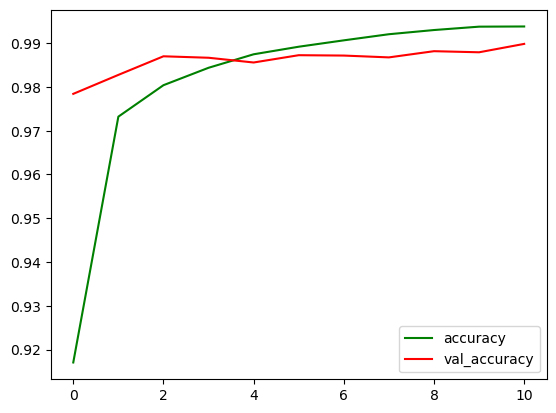

In [34]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

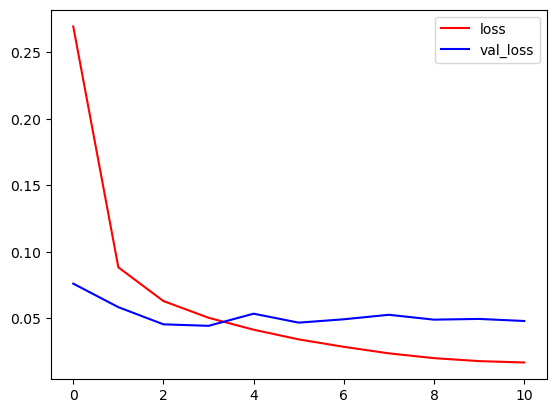

In [36]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


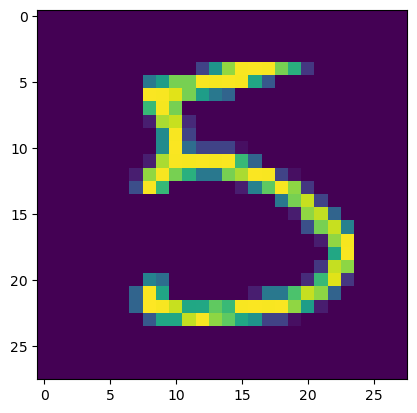

5


In [38]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))